# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [60]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize']=(6, 3)

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')


#### Print `temp`

In [6]:
temp.columns=[e.lower().replace(' ','_') for e in temp.columns]

temp

,city,state,temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [8]:
temp[temp.state == 'New York']

,city,state,temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [9]:
temp[temp.state == 'New York'].mean()


temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [10]:
temp[['city', 'state']][temp.temperature > 15]


,city,state
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [11]:
temp.city[temp.temperature > 15]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: city, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [13]:
temp.city[(temp.temperature > 15) & (temp.temperature < 20)]


0         NYC
3    Hartford
Name: city, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [23]:
temp.groupby("state").agg({'temperature': ['mean', 'std']})





temperature          
                   mean       std
state                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [29]:
employee = pd.read_csv('employee.csv')


In [31]:
employee.columns=[e.lower().replace(' ','_') for e in employee]

#### Explore the data types of the Temp dataframe. Comment your results

In [32]:
employee

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

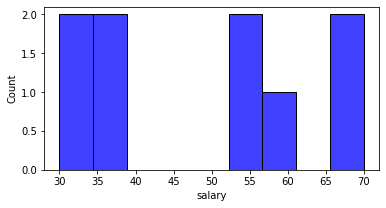

In [38]:
sns.histplot(x=employee.salary, color='b', bins=9);

#### What's the average salary in this company?

In [40]:
employee.salary.mean()

48.888888888888886

#### What's the highest salary?

In [41]:
employee.salary.max()

70

#### What's the lowest salary?

In [42]:
employee.salary.min()


30

#### Who are the employees with the lowest salary?

In [44]:
employee.name[employee.salary == 30]

1    Maria
2    David
Name: name, dtype: object

#### Could you give all the information about an employee called David?

In [45]:
employee[employee.name == 'David']


,name,department,education,gender,title,years,salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [46]:
employee.salary[employee.name == 'David']


2    30
Name: salary, dtype: int64

#### Print all the rows where job title is associate

In [48]:
employee[employee.title == 'associate']

,name,department,education,gender,title,years,salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [49]:
employee.head(3)


,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [51]:
employee.iloc[:3]


,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [52]:
employee[(employee.title == 'associate') & (employee.salary >55)]

,name,department,education,gender,title,years,salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [53]:
employee.groupby('years').agg({'salary': 'mean'})

,salary
years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [54]:
employee.groupby('title').agg({'salary': 'mean'})

,salary
title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [56]:
# draw boxplot here

employee.describe().T

,count,mean,std,min,25%,50%,75%,max
years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0


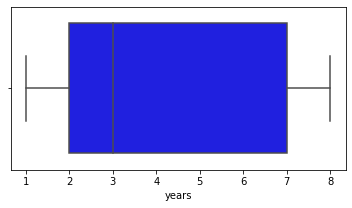

In [59]:
sns.boxplot(x=employee.years, color='b');

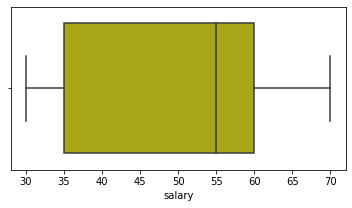

In [58]:
sns.boxplot(x=employee.salary, color='y');

In [63]:
np.quantile(employee.salary, 0.25)  # Q1, cuantil no es cuartil, cuartil divide en 4 partes, cuantil divide entre 0 y 1

35.0

In [62]:
np.quantile(employee.salary, 0.75)  # Q3

60.0

In [65]:
employee.years.quantile(q=0.25)

2.0

In [66]:
employee.years.quantile(q=0.75)

7.0

#### Is the mean salary per gender different?

In [67]:
employee

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [68]:
employee.groupby('gender').mean()

,years,salary
gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [69]:
employee.groupby('department').agg({'min', 'mean', 'max'})

years               salary           
             min      mean max    min   mean max
department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [76]:
def rango(x):
    return max(x) - min(x)

employee.groupby('department').agg({'salary': rango})


,salary
department,
HR,40
IT,40
Sales,0


In [77]:
employee.groupby('department').agg({'salary': lambda x: max(x) - min(x)})

,salary
department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [79]:
orders = pd.read_csv('Orders.zip',compression='zip')
orders.columns=[e.lower().replace(' ','_') for e in orders.columns]
orders

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [80]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unnamed:_0    397924 non-null  int64  
 1   invoiceno     397924 non-null  int64  
 2   stockcode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   description   397924 non-null  object 
 8   quantity      397924 non-null  int64  
 9   invoicedate   397924 non-null  object 
 10  unitprice     397924 non-null  float64
 11  customerid    397924 non-null  int64  
 12  country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [81]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed:_0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
invoiceno,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
unitprice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
customerid,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


####  What is the average Purchase Price?

In [82]:
orders.amount_spent.mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [83]:
orders.amount_spent.max()

168469.6

In [84]:
orders.amount_spent.min()

0.0

#### Select all the customers we have in Spain

In [93]:
orders.customerid[orders.country == 'Spain'].unique()

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442], dtype=int64)

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [89]:
len(orders.customerid[orders.country == 'Spain'].unique())

30

In [106]:
orders.customerid[orders.country == 'Spain'].value_counts().count()

30

#### Select all the customers who have bought more than 50 items ?

In [92]:
orders.customerid[orders.quantity > 50].unique()

array([13748, 15291, 14688, ..., 15877, 13298, 16446], dtype=int64)

#### Select orders from Spain that are above 50 items

In [95]:
orders.invoiceno[(orders.country == 'Spain') & (orders.quantity > 50)].head()

4250    536944
4251    536944
4252    536944
4253    536944
4254    536944
Name: invoiceno, dtype: int64

#### Select all free orders

In [113]:
orders.invoiceno[(orders.amount_spent == 0)].head()

6914     537197
22539    539263
25379    539722
29080    540372
29082    540372
Name: invoiceno, dtype: int64

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [117]:
orders.invoiceno[orders.description.str.contains('lunch bag')].head()

93     536378
172    536385
354    536401
359    536401
360    536401
Name: invoiceno, dtype: int64

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [118]:
orders.invoiceno[(orders.description.str.contains('lunch bag')) & (orders.year ==2011)].head()

26340    540015
26341    540015
26512    540023
26513    540023
26860    540098
Name: invoiceno, dtype: int64

#### Show the frequency distribution of the amount spent in Spain.

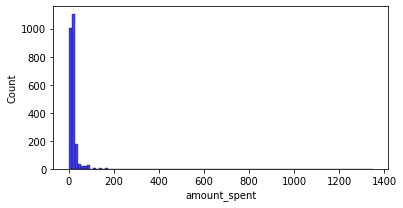

In [123]:
sns.histplot(x=orders.amount_spent[orders.country == 'Spain'], color='b', bins=100);

#### Select all orders made in the month of August

In [126]:
orders[orders.month == 8].head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [135]:
orders[orders.month == 8].groupby('country').agg({'year':'count'})

,year
country,
Australia,107
Austria,88
Belgium,194
Canada,5
Channel Islands,140
Denmark,16
EIRE,593
Finland,61
France,569


#### What's the  average amount of money spent by country

In [151]:
orders.groupby('country').agg({'amount_spent':'mean'}).sort_values('amount_spent', ascending=False).head()

,amount_spent
country,
Netherlands,120.798282
Australia,116.895620
Japan,116.561900
Singapore,95.852658
Sweden,85.096075


#### What's the most expensive item?

In [142]:
orders.unitprice.max()

8142.75

In [141]:
orders.description[orders.amount_spent == orders.unitprice.max()]

118352    postage
Name: description, dtype: object

#### What was the average amount spent per year ?

In [147]:
orders.groupby('year').agg({'amount_spent': 'mean'})

,amount_spent
year,
2010,21.892733
2011,22.430074
